In [37]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
import random

def get_data(x0):
    r = 3.9
    x = []
    x.append(x0)
    for i in range(1,1100):
        x1=x0*r*(1-x0)
        x0=x1
        x.append(x1)
    x=np.asarray(x)
    return(x)

menor = np.loadtxt("esn_new_minstable_r3.9_x0.1_f1a40_d200_.csv", delimiter=",")
list_of_x0 = np.loadtxt("esn_random_x0.1_r3.9.csv", delimiter=" ")

menor = menor[:(menor.shape[0]-int(menor.shape[0]%40)),:]
print(menor.shape,list_of_x0.shape)


(480, 5) (10000,)


In [51]:
def get_array(erro_list):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)/5),5)
    return erro_array

def get_array2(erro_list):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)),10)
    return erro_array


def turnintoarray(erro_list,d):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)),d)
    return erro_array


def geterrors(FUTUREerror):
    
    a = abs(FUTUREerror)
    b = FUTUREerror**2
    
    mae = []
    mse = []
    rmse = []
    
    mae=(np.sum(a)/FUTUREerror.shape[0])
    mse=(np.sum(b)/FUTUREerror.shape[0])
    rmse=(np.sqrt(np.sum(b)/FUTUREerror.shape[0]))
        
   
    
    return mae,mse,rmse
    

In [40]:


future_error = []
future_error2d = []
future_error3d = []
future_error4d = []



for i in range(menor.shape[0]):
    data = get_data(list_of_x0[i])
    
    future_t = np.zeros((10))
    esn = ESN(n_inputs = 1,
        n_outputs = 1,
      n_reservoir = int(menor[i][1]),
      spectral_radius = menor[i][2],
      random_state=42)
    trainlen = 200
    future = int(menor[i][4])
    pred_training = esn.fit(np.ones(trainlen),data[0:trainlen])

    prediction = esn.predict(np.ones(future))
    error = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
    print(i,'test error:',error)
   
    future_error.append(prediction.flatten()-data[trainlen:trainlen+future])
    if error<0.1 and error>=0.01:
        future_error2d.append(prediction.flatten()-data[trainlen:trainlen+future])
    elif error<0.01 and error>=0.001:
        future_error3d.append(prediction.flatten()-data[trainlen:trainlen+future])
    elif error<0.001:
        future_error4d.append(prediction.flatten()-data[trainlen:trainlen+future])

    
    
    

0 test error: 6.2855036896680705e-06
1 test error: 0.0014957081540572514
2 test error: 0.0018818241623731744
3 test error: 0.004757661053675277
4 test error: 0.004796160328785119
5 test error: 0.0005929834646672602
6 test error: 0.011353621058325228
7 test error: 0.05315782766920555
8 test error: 0.024816914321541587
9 test error: 0.1538599895034518
10 test error: 0.03456735627774992
11 test error: 0.24576947921631662
12 test error: 0.12331275198169032
13 test error: 0.07603878650366343
14 test error: 0.23486343002062335
15 test error: 0.23489268234222094
16 test error: 0.40719997686257037
17 test error: 0.4130040311967714
18 test error: 0.4370373837097366
19 test error: 0.23366906936480503
20 test error: 0.3663393298494055
21 test error: 0.22159157260550896
22 test error: 0.37280006337242655
23 test error: 0.3276957174708917
24 test error: 0.3600326335756511
25 test error: 0.40553722247213
26 test error: 0.2228049307867564
27 test error: 0.45613398195053223
28 test error: 0.3045981941

241 test error: 0.00047568388891322533
242 test error: 0.00489875556879064
243 test error: 0.005451803487353498
244 test error: 0.0029792372064032075
245 test error: 0.0091014863554068
246 test error: 0.004218861130776282
247 test error: 0.0013854602147889245
248 test error: 0.07037962892302958
249 test error: 0.06074746862249675
250 test error: 0.034183254553875365
251 test error: 0.11697114430183217
252 test error: 0.11770159682312033
253 test error: 0.21231255477524955
254 test error: 0.32854119811893
255 test error: 0.17188923666507253
256 test error: 0.18558649854348064
257 test error: 0.2631735429184284
258 test error: 0.3668753617634457
259 test error: 0.3760202279073696
260 test error: 0.3393779860406878
261 test error: 0.3460632265065251
262 test error: 0.3756828821174376
263 test error: 0.4278507638934206
264 test error: 6.398498717611062
265 test error: 0.30465278273473606
266 test error: 4.703394932287826
267 test error: 0.3501981894452029
268 test error: 0.3901729816809053

In [53]:
print(future_error)
mae = np.zeros((menor.shape[0]))
mse = np.zeros((menor.shape[0]))
rmse = np.zeros((menor.shape[0]))

for i in range(menor.shape[0]):
    FUTUREerror = np.asarray(future_error[i])
    mae[i],mse[i],rmse[i] = geterrors(FUTUREerror)


print('mae',mae,'\n mse',mse,'\n rmse',rmse,'\n')



[array([-6.28550369e-06]), array([-0.00149571]), array([-0.00227094,  0.00138758]), array([-0.00102575,  0.00381118,  0.00723386]), array([ 0.00110979, -0.00327106, -0.00884915, -0.00133179]), array([-3.74093310e-04,  7.16201588e-04,  2.57675739e-04,  7.37801840e-05,
       -1.01657077e-03]), array([ 0.0026578 ,  0.00228526, -0.00756157,  0.01272629,  0.00644699,
       -0.02237057]), array([-0.00330771,  0.00386606, -0.01254657, -0.03482571, -0.04535058,
        0.12609678,  0.02066584]), array([-0.00458785,  0.02213726,  0.06321122,  0.00112383, -0.00127098,
       -0.00383867, -0.00611626,  0.01911143]), array([-0.00332553,  0.01352749,  0.03375831, -0.0113123 ,  0.03822135,
        0.10694883,  0.04789688, -0.16761875, -0.41025034]), array([ 0.00056016, -0.00019412, -0.00143582, -0.00067405,  0.0028808 ,
        0.00799694,  0.01008409, -0.0336168 , -0.02953725,  0.09884167]), array([-0.00260215,  0.0083995 , -0.02124387,  0.01261258, -0.04486052,
       -0.11325519,  0.05730176, -

[6.28550369e-06 1.49570815e-03 1.82925724e-03 4.02359776e-03
 3.64044669e-03 4.87664318e-04 9.00807989e-03 3.52370355e-02
 1.51746866e-02 9.25399761e-02 1.85821724e-02 1.61092089e-01
 7.01203161e-02 4.16886762e-02 1.53942903e-01 1.51485027e-01
 3.06667682e-01 3.13421879e-01 3.43726796e-01 1.63432075e-01
 2.98624473e-01 1.27415916e-01 2.61574351e-01 2.10082132e-01
 2.45249889e-01 3.07489679e-01 1.30878451e-01 3.51349250e-01
 1.94930546e-01 1.88505490e-01 2.95300809e-01 3.29674048e-01
 2.51054322e-01 2.56996251e-01 2.16185934e-01 1.85038271e-01
 3.17039940e-01 1.93006361e-01 3.69778977e-01 3.01727686e-01]


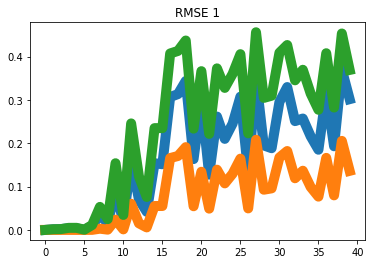

[0.31211489 0.00254792 0.00074411 0.00536614 0.00123042 0.00468824
 0.00498548 0.0034886  0.00707401 0.01679919 0.01055118 0.02526893
 0.00880451 0.00979466 0.14957396 0.13945308 0.07618432 0.16021769
 0.23266057 0.18471332 0.01454642 0.13802448 0.24228238 0.22297529
 0.23590716 0.1546635  0.12570032 0.11489581 0.17924488 0.18826084
 0.18090975 0.27931413 0.23477084 0.29509668 0.23280787 0.32929091
 0.19681416 0.31603438 0.27813612 0.34383098]


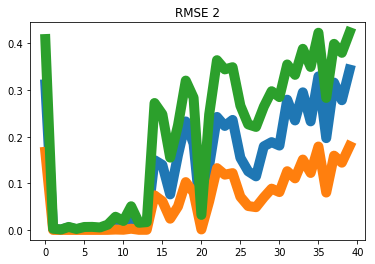

[2.96220363e-01 1.80888829e-03 3.39761445e-04 1.11106437e-03
 1.47526507e-03 4.13293212e-03 4.54832457e-03 1.13213450e-02
 4.76491525e-03 7.31869757e-03 1.11364279e-02 4.29114424e-02
 3.12817672e-02 1.76393233e-01 9.03054591e-02 1.48726442e-01
 1.85997653e-01 2.61006775e-01 2.17326503e-01 3.07414299e-01
 3.65681076e-01 3.75481776e-01 2.83877054e-01 2.25636477e-01
 1.21952418e-01 2.36894938e-01 3.24939095e-01 2.46308335e-01
 2.76564113e+00 3.10248634e-01 4.29010652e-01 1.82282220e-01
 3.74983424e+00 3.43438051e-01 2.32665426e-01 3.36361341e-01
 2.56540142e-01 2.05415383e-01 2.47670308e-01 3.07426166e-01]


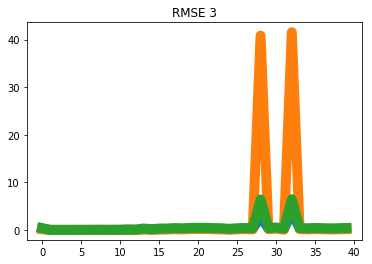

[0.29924731 0.00674677 0.00128882 0.00089149 0.00429669 0.01582273
 0.00880651 0.04959928 0.01886739 0.00269365 0.0870354  0.03718953
 0.09458367 0.02773588 0.16797268 0.28684401 0.12872542 0.17466736
 0.10933492 0.25256338 0.26220032 0.20450057 0.22008391 0.23006689
 0.25532146 0.17675674 0.29861953 0.19643839 0.0810579  0.33180406
 0.32931909 0.27528574 0.29472849 0.23930146 0.30898248 0.25599442
 0.33228396 0.347044   0.3055253  0.23108303]


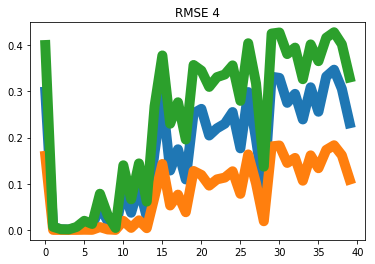

[2.49522338e-01 4.40910162e-03 1.30782695e-03 8.99517237e-04
 9.58113467e-03 8.21830942e-03 8.13446935e-03 5.16683179e-03
 1.33676590e-02 4.66910809e-03 3.54458774e-02 3.17395017e-02
 5.90324599e-02 1.50080781e-01 1.56432757e-01 1.31687496e-01
 3.54037463e-01 3.62941191e-01 2.60878805e+00 2.56033537e-01
 2.80537870e-01 1.80244668e-01 1.89531048e-01 2.11988181e-01
 2.81550522e-01 3.10772035e-01 2.27488620e-01 1.66593264e-01
 2.62092175e-01 2.05918403e-01 1.89718912e-01 3.78509827e-01
 3.28991264e-01 2.20259864e-01 3.82059896e-01 2.47492328e-01
 3.49379734e-01 2.71549791e-01 3.47962848e-01 2.54143068e+00]


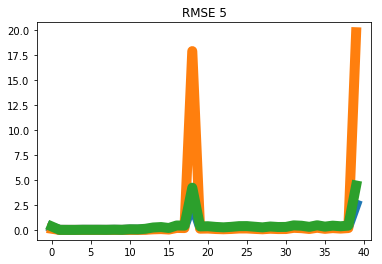

[1.99771319e+00 4.66145010e-03 3.84624352e-03 1.34087938e-02
 6.38573674e-03 9.94778047e-03 1.05064189e-03 1.20138455e-02
 2.11783575e-02 6.56209264e-02 1.97943419e-02 1.36315443e-02
 1.55316088e-01 2.35394392e-01 2.88920612e-02 1.68500076e-01
 1.84546369e-01 1.86981409e-01 1.17655263e-01 1.78800530e-01
 1.28308629e-01 2.84704370e-01 1.63888459e-01 2.26940565e-01
 1.87529081e-01 1.09297689e-01 1.04470969e-01 2.15282767e-01
 2.97355734e-01 3.25641544e-01 3.77002044e-01 1.96091518e-01
 2.75039831e-01 2.84081669e-01 2.00687972e-01 3.22411163e-01
 3.09526653e-01 3.68096571e-01 2.00360252e-01 2.22359125e-01]


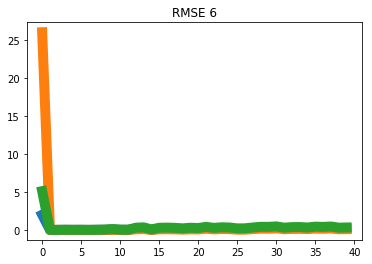

[1.81222514e-01 4.75683889e-04 4.25390226e-03 4.33641198e-03
 2.61880687e-03 6.05505279e-03 3.07010646e-03 1.12080270e-03
 4.18514445e-02 3.40019922e-02 2.16395080e-02 6.78651438e-02
 6.11541056e-02 1.14729999e-01 2.12852124e-01 8.90350587e-02
 1.20666650e-01 1.46347488e-01 2.54967885e-01 2.54098878e-01
 2.43672677e-01 2.34143317e-01 2.07539063e-01 3.40366832e-01
 3.45669651e+00 1.81049077e-01 2.94582568e+00 2.65748844e-01
 3.31088274e-01 3.52501063e-01 3.53896470e-01 3.51740095e-01
 2.54291241e-01 2.22140632e-01 3.17705690e-01 3.18714086e-01
 3.19340749e-01 3.14255032e-01 3.09602257e-01 2.54723354e-01]


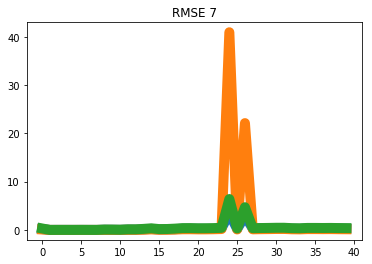

[3.17702577e-01 8.91672904e-04 3.68784317e-03 2.40090516e-04
 1.18199991e-03 3.94863410e-03 9.05686440e-04 8.58229904e-03
 2.83795548e-03 3.25410180e-02 2.15220285e-02 8.76543113e-04
 3.50782872e-03 6.67533711e-02 2.18320129e-01 1.42569656e-01
 1.78063862e-01 9.06300907e-02 5.46023690e-02 1.98592362e-01
 1.34133196e-01 2.02591308e-01 2.32791801e-01 3.07328023e-01
 2.27115393e-01 2.17447995e-01 1.36997000e-01 2.36621924e-01
 3.05942023e-01 2.53377244e-01 2.32508359e-01 3.01688815e-01
 2.84765932e-01 2.70273659e-01 2.78456903e-01 1.98568765e-01
 2.60605618e-01 3.25752723e-01 2.84183056e-01 2.64179061e-01]


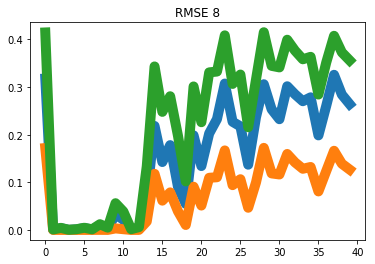

[0.37287254 0.00705979 0.00065745 0.0016069  0.00196055 0.00311953
 0.01094421 0.00322898 0.03594029 0.03416511 0.05601152 0.05108685
 0.00661958 0.17453496 0.02649734 0.10902096 0.14224389 0.23999379
 0.29671384 0.17269997 0.21675848 0.1459048  0.14701882 0.21156458
 0.16227763 0.11910407 0.20836344 0.26803688 0.22762219 0.20161082
 0.23802937 0.38573007 0.39751344 0.36472986 0.34638228 0.15295259
 0.29932894 0.2675437  0.36615271 0.32807483]


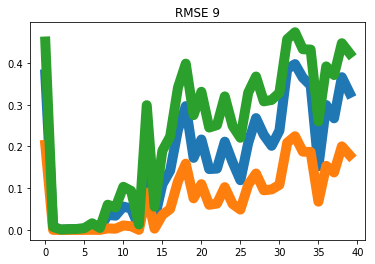

[3.16208538e-01 3.03437114e-02 1.97517453e-03 2.55962676e-04
 7.53419697e-03 3.16603475e-03 1.81270200e-02 2.06534128e-02
 2.82820390e-02 1.51672769e-02 1.37404600e-02 5.88909833e-02
 1.05334593e-02 2.68576853e-02 3.31336076e-02 8.53514095e-02
 1.09566678e-01 6.32048343e-03 2.52698799e-01 1.54758963e-01
 2.35960720e-01 1.63282001e-01 2.84053689e-01 1.58907290e-01
 2.35270293e-01 1.50672178e-01 1.43998147e-01 7.20082872e-02
 2.84738340e-01 2.03385202e-01 2.59147532e-01 3.20994180e-01
 2.46595792e-01 3.54783555e-01 2.72025115e-01 2.05337631e-01
 3.05173705e-01 3.47038766e-01 2.95905500e-01 2.89285507e-01]


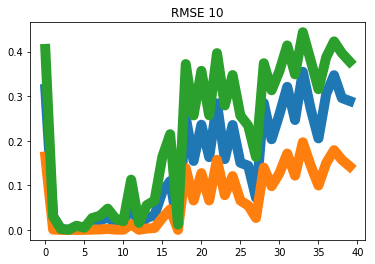

[0.29986591 0.0082193  0.00428344 0.00867515 0.00304369 0.00808562
 0.01662893 0.03394638 0.11916441 0.00177375 0.0589774  0.03727799
 0.04745914 0.17452693 0.05140308 0.15223678 0.19974921 0.05133747
 0.05066959 0.19113806 0.30355902 0.20034928 0.08932643 0.15900333
 0.12209259 0.27820849 0.2492106  0.27346541 0.25583248 0.26186098
 0.19201333 0.27057729 0.23023749 0.12475211 0.27610106 0.43035756
 0.35011131 0.34133194 0.32430721 0.35603604]


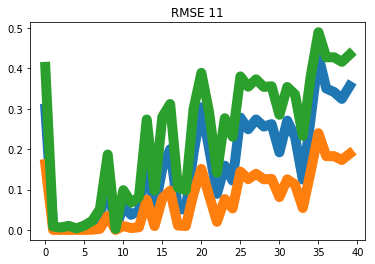

[3.91181487e-01 3.31012031e-04 1.52236957e-02 5.73337848e-03
 4.25856378e-03 8.84943326e-03 1.11154867e-02 2.10799522e-02
 4.67136144e-02 8.52964123e-02 3.60047478e-02 8.76935698e-02
 6.17356023e-02 1.92479762e-01 4.95378116e-03 1.15610846e-01
 2.06607873e-01 3.07305065e-01 2.29497893e-01 5.87992494e-02
 2.89047569e-01 2.16342407e-01 2.29458559e-01 2.48040326e-01
 3.10710055e-01 3.12798346e-01 2.31576427e-01 2.73489778e-01
 2.35970039e-01 2.56699809e-01 3.35838943e-01 2.03303648e-01
 2.88305458e-01 3.04858419e-01 2.82727165e-01 3.84210576e-01
 2.07818298e-01 3.32102279e-01 2.19441991e-01 1.99182862e-01]


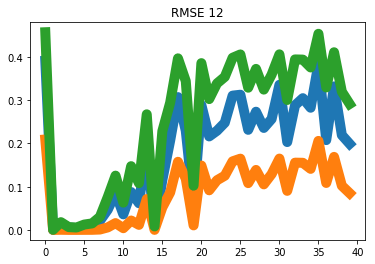

[[6.28550369e-06 1.49570815e-03 1.82925724e-03 4.02359776e-03
  3.64044669e-03 4.87664318e-04 9.00807989e-03 3.52370355e-02
  1.51746866e-02 9.25399761e-02 1.85821724e-02 1.61092089e-01
  7.01203161e-02 4.16886762e-02 1.53942903e-01 1.51485027e-01
  3.06667682e-01 3.13421879e-01 3.43726796e-01 1.63432075e-01
  2.98624473e-01 1.27415916e-01 2.61574351e-01 2.10082132e-01
  2.45249889e-01 3.07489679e-01 1.30878451e-01 3.51349250e-01
  1.94930546e-01 1.88505490e-01 2.95300809e-01 3.29674048e-01
  2.51054322e-01 2.56996251e-01 2.16185934e-01 1.85038271e-01
  3.17039940e-01 1.93006361e-01 3.69778977e-01 3.01727686e-01]
 [3.12114891e-01 2.54791563e-03 7.44113530e-04 5.36614175e-03
  1.23042399e-03 4.68823715e-03 4.98548470e-03 3.48860268e-03
  7.07400639e-03 1.67991905e-02 1.05511764e-02 2.52689345e-02
  8.80451161e-03 9.79465721e-03 1.49573964e-01 1.39453085e-01
  7.61843211e-02 1.60217693e-01 2.32660570e-01 1.84713324e-01
  1.45464212e-02 1.38024477e-01 2.42282380e-01 2.22975290e-01
  2.359

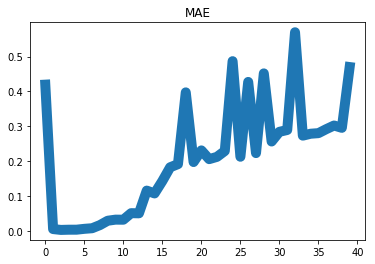

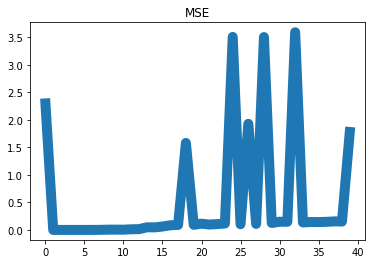

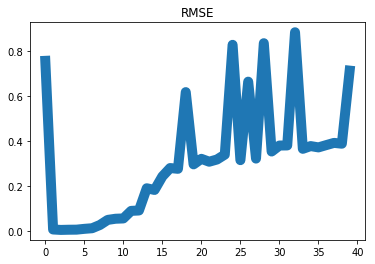

In [62]:
t=np.arange(40)
MAE = np.zeros((int(menor.shape[0]/40),40))
MSE = np.zeros((int(menor.shape[0]/40),40))
RMSE = np.zeros((int(menor.shape[0]/40),40))

#fig, ax = plt.subplots(figsize=(10, 50))
beg = 0
end = 40 

for i in range(int(menor.shape[0]/40)):
    #plt.subplot(int(menor.shape[0]/40),1,i+1)
    plt.title('MAE %d' %(i+1))
    plt.plot(t, mae[beg:end],linewidth=10)
    MAE[i] = mae[beg:end]
    print(mae[beg:end])
    plt.title('MSE %d' %(i+1))
    plt.plot(t, mse[beg:end],linewidth=10)
    MSE[i] = mse[beg:end]
    plt.title('RMSE %d' %(i+1))
    plt.plot(t, rmse[beg:end],linewidth=10)
    RMSE[i] = rmse[beg:end]
    beg = beg+40
    end = end+40
    plt.show()
    
mae_tot=[]
mse_tot=[]
rmse_tot=[]

for i in range(MAE.shape[1]):
    mae_tot.append(np.sum(MAE,axis=0)[i]/MAE.shape[0])
    mse_tot.append(np.sum(MSE,axis=0)[i]/MSE.shape[0])
    rmse_tot.append(np.sum(RMSE,axis=0)[i]/RMSE.shape[0])
    
print(MAE,mae_tot)

plt.title('MAE')
plt.plot(t, mae_tot,linewidth=10)

plt.show()

plt.title('MSE')
plt.plot(t, mse_tot,linewidth=10)

plt.show()

plt.title('RMSE')
plt.plot(t, rmse_tot,linewidth=10)

plt.show()
   

In [ ]:
t=np.arange(len(MAE))


fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAEc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSEc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSEc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE 2d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAE2Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE 2d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSE2Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE 2d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSE2Dc[:,i],linewidth=10)
plt.show()


fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE 3d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAE3Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE 3d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSE3Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE 3d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSE3Dc[:,i],linewidth=10)
plt.show()


fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE 4d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAE4Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE 4d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSE4Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE 4d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSE4Dc[:,i],linewidth=10)
plt.show()

In [ ]:
#------ ERROS GERAIS, DE CADA BLOCO

print('ERROS DOS 10 PRIMEIROS TERMOS, POR BLOCOS \n')



label = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


index = np.arange(len(MAE[-1]))
plt.bar(index, MAE[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE geral')
plt.show()

index = np.arange(len(MSE[-1]))
plt.bar(index, MSE[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE geral')
plt.show()



index = np.arange(len(RMSE[-1]))
plt.bar(index, RMSE[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE geral')
plt.show()

#------ ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL
print('\n \n ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL \n')


index = np.arange(len(MAE2D[-1]))
plt.bar(index, MAE2D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 2 casa decimal')
plt.show()

index = np.arange(len(MSE2D[-1]))
plt.bar(index, MSE2D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 2 casa decimal')
plt.show()


index = np.arange(len(RMSE[-1]))
plt.bar(index, RMSE2D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 2 casa decimal')
plt.show()
    
#------ ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL
print('\n \n ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL \n')

index = np.arange(len(MAE3D[-1]))
plt.bar(index, MAE3D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 3 casa decimal')
plt.show()



index = np.arange(len(MSE3D[-1]))
plt.bar(index, MSE3D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 3 casa decimal')
plt.show()



index = np.arange(len(RMSE3D[-1]))
plt.bar(index, RMSE3D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 3 casa decimal')
plt.show()
  
    
#------ ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL
print('\n \n ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL \n')



index = np.arange(len(MAE4D[-1]))
plt.bar(index, MAE4D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 4 casa decimal')
plt.show()


index = np.arange(len(MSE4D[-1]))
plt.bar(index, MSE4D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 4 casa decimal')
plt.show()


index = np.arange(len(RMSE4D[-1]))
plt.bar(index, RMSE4D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 4 casa decimal')
plt.show()
